In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
import squarify
#import our palette class from colors.py
from colors import Palette

# %matplotlib notebook
%matplotlib inline

In [41]:
# obter o dataset dos impostos de 2018

In [42]:
df = pd.read_csv('impostos_2018')

In [43]:
df.index = df['Unnamed: 0'].values

In [44]:
df.drop(columns=df.columns[0], inplace=True)

In [45]:
new_idx= ['Federal','Estadual','Municipal']
df=df.reindex(new_idx)

In [46]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
Federal,1.522279e+11,1.106890e+11,1.169892e+11,1.279465e+11,1.128549e+11,1.189947e+11,1.222520e+11,1.166667e+11,1.175650e+11,1.433817e+11,1.238599e+11,1.434499e+11
Estadual,6.697903e+10,4.870228e+10,5.147431e+10,5.629541e+10,4.965523e+10,5.235668e+10,5.372910e+10,5.133238e+10,5.184065e+10,6.308679e+10,5.449734e+10,6.318690e+10
Municipal,1.566376e+10,1.138955e+10,1.203782e+10,1.316528e+10,1.161240e+10,1.224417e+10,1.257934e+10,1.200462e+10,1.212349e+10,1.475352e+10,1.274478e+10,1.477693e+10


In [47]:
#--------------------------------------------------------------------------------------------------------------

In [48]:
# vamor criar nossa pallete de cores 

In [49]:
cores1 = Palette(9, 0.65, 'spring')

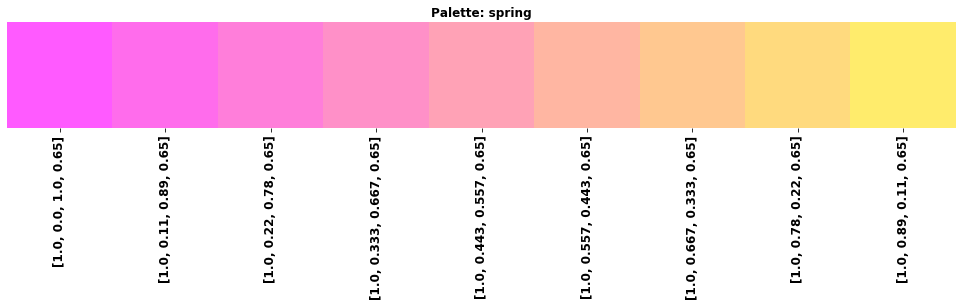

In [50]:
cores1.graph()

In [51]:
# obeter os codigos RGBA's atraves do nosso metodo 'get_colors'

In [52]:
cores_lista1 = cores1.get_colors();

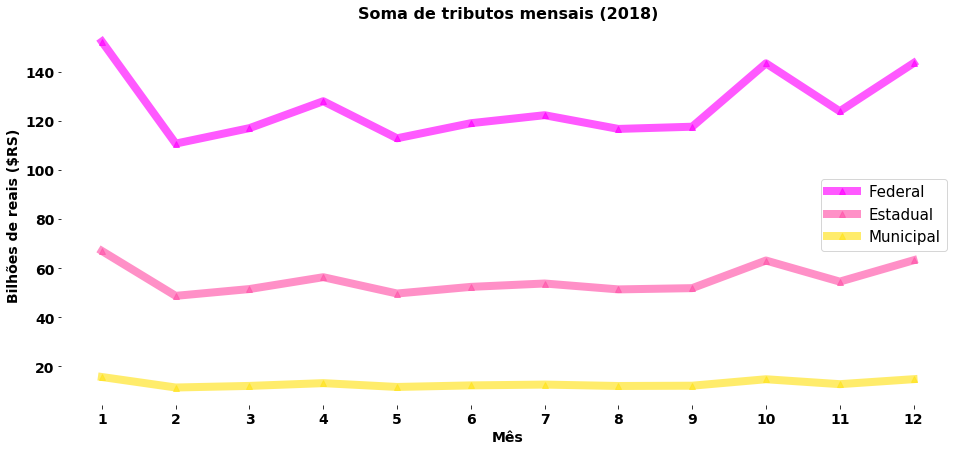

In [53]:
fig, ax = plt.subplots(figsize=(16,7));

ax.plot(df.iloc[0,:] , linewidth=8, marker='^',label = df.index[0] , color=cores_lista1[0]) # primeira cor
ax.plot(df.iloc[1,:] , linewidth=8, marker='^',label = df.index[1] , color=cores_lista1[3]) # cor da metade
ax.plot(df.iloc[2,:] , linewidth=8, marker='^',label = df.index[2] , color=cores_lista1[-1]) # ultima cor

ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e9)) # bilions scale
ax.yaxis.set_major_formatter(ticks_x)

plt.xticks(df.columns,  fontsize=14 , weight='bold')
plt.yticks(fontsize=14 , weight='bold')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.legend(fontsize=15);
plt.ylabel('Bilhões de reais ($RS)', {'weight':'bold', 'fontsize': 14  })
plt.xlabel('Mês', {'weight':'bold', 'fontsize': 14  })
plt.title('Soma de tributos mensais (2018)', fontsize=16, weight='bold');
plt.show()

In [54]:
#---------------------------------------------------tree map----------------------------------------

In [76]:
cores2 = Palette(8, 0.6, 'rainbow')

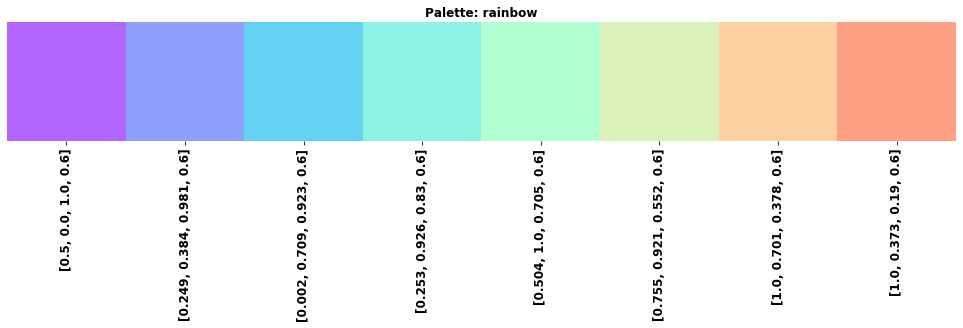

In [77]:
cores2.graph()

In [79]:
cores_lista2 = cores2.get_colors();

In [80]:
# obter a media anual em bilhões
media_anual = df.mean(axis=1)/1e9

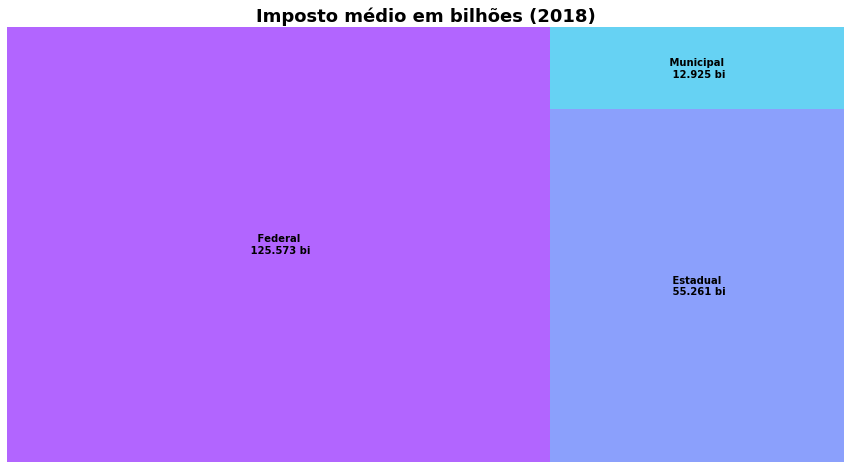

In [81]:
labels = [ " {} \n {} bi".format(nome,round(num,3)) for nome, num in zip(media_anual.index,media_anual.values) ]

fig, ax = plt.subplots(figsize=(15,8));
squarify.plot(sizes=media_anual.values, label=labels , color=cores_lista2[:3] , text_kwargs={'fontsize':10, 'weight':'heavy'})
plt.axis('off')
plt.title('Imposto médio em bilhões (2018)', fontsize=18, weight ='heavy')
plt.show()